  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

<Figure size 1200x800 with 0 Axes>

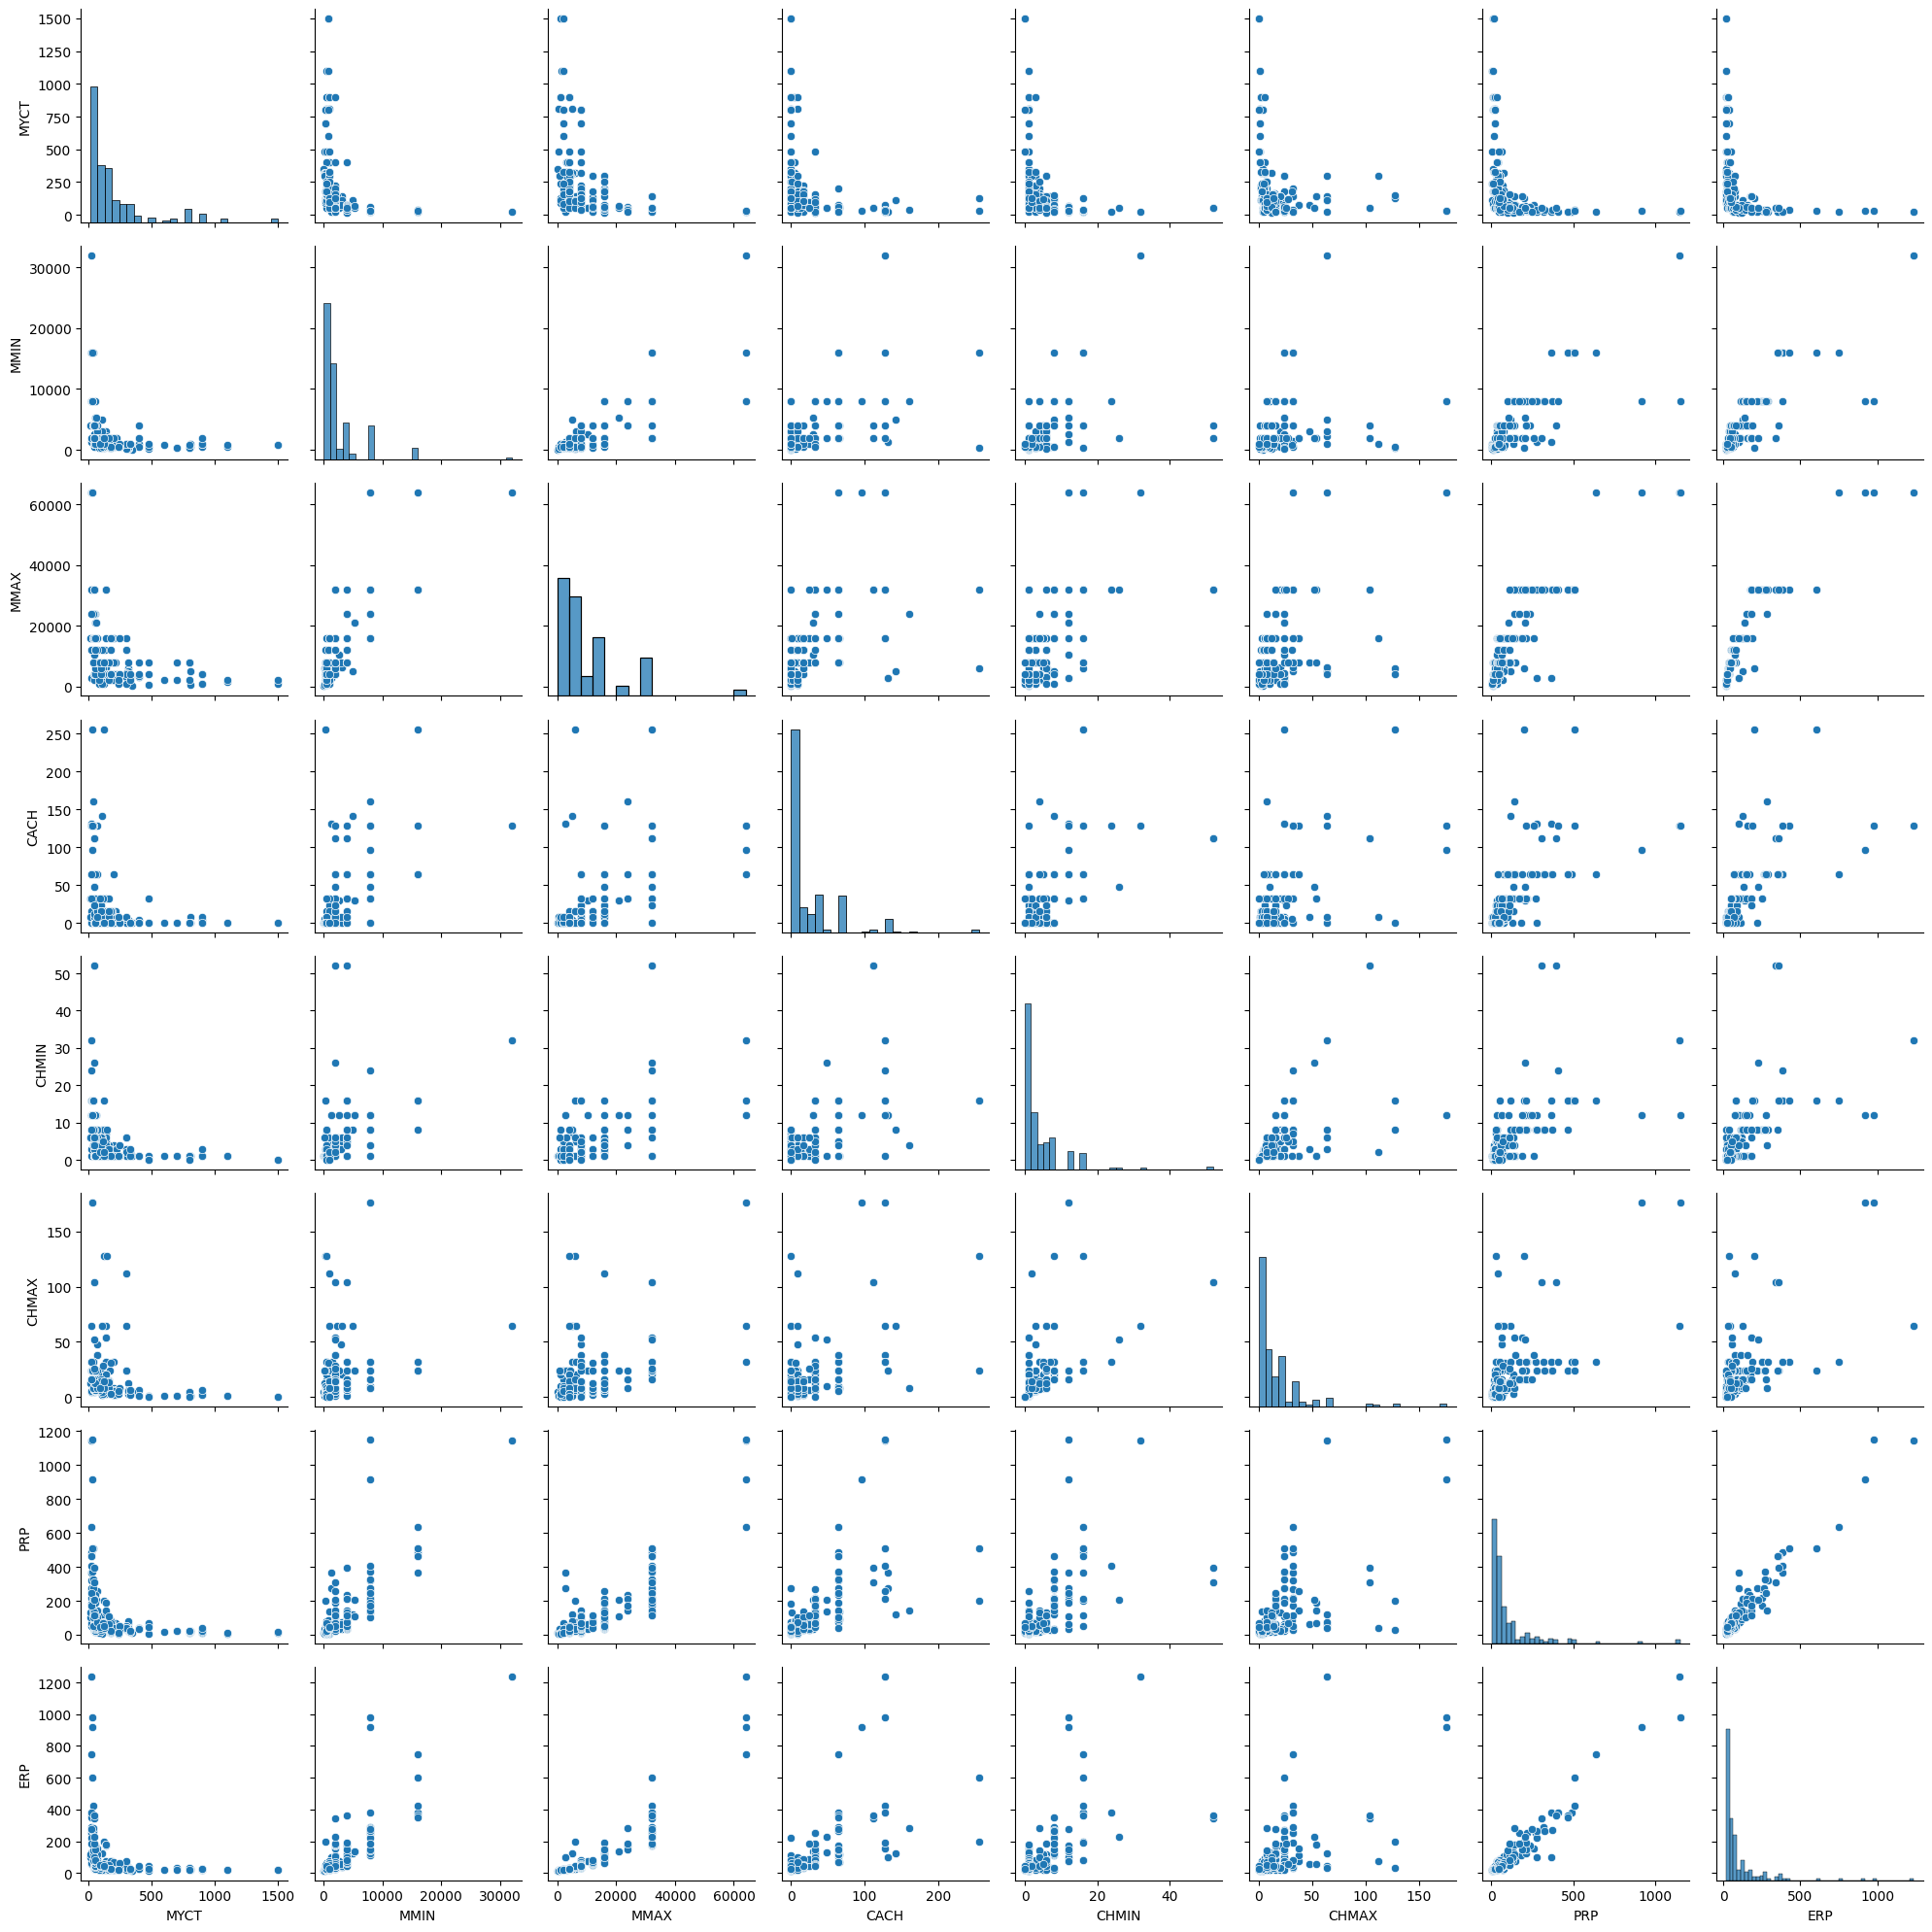

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('machine.data_update.csv')

print(data.head())
print(data.info())

numeric_data = data.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(12, 8))
sns.pairplot(numeric_data)
plt.tight_layout()
plt.show()


In [18]:
print(data.isnull().sum())

X = numeric_data.drop('PRP', axis=1)
y = numeric_data['PRP']

X = numeric_data.drop('PRP', axis=1)
y = numeric_data['PRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 2370.10
Mean Absolute Error: 31.41
R^2 Score: 0.95


In [20]:

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross Validation R^2 Scores: {cv_scores}')
print(f'Mean CV R^2: {np.mean(cv_scores):.2f} +/- {np.std(cv_scores):.2f}')


Cross Validation R^2 Scores: [0.84333007 0.69067302 0.87760198 0.87717886 0.87808498]
Mean CV R^2: 0.83 +/- 0.07


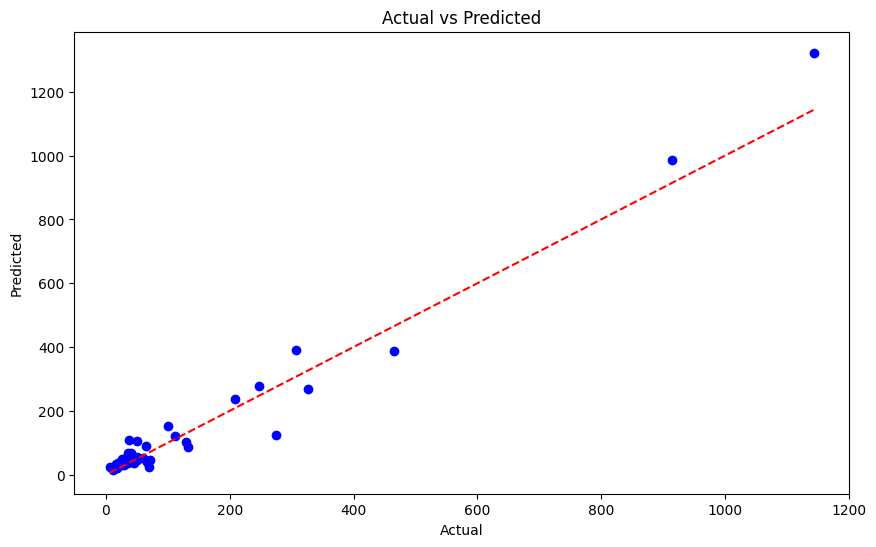

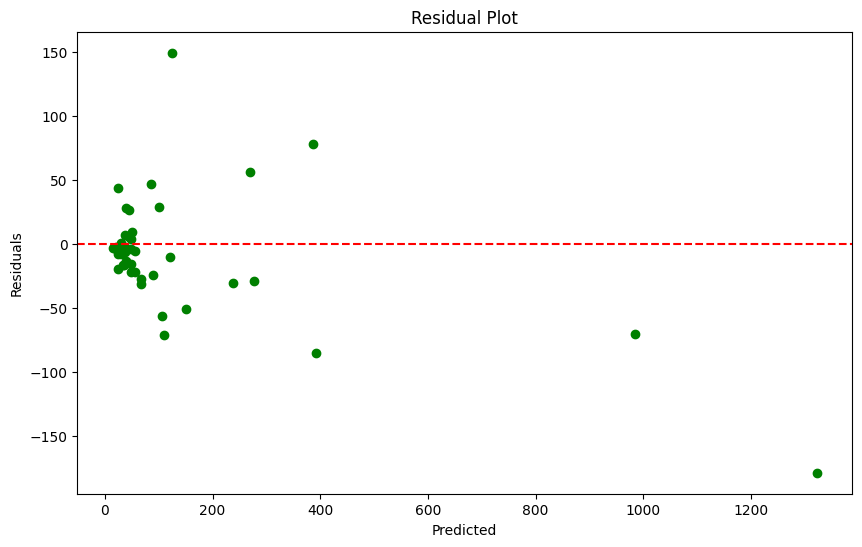

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Train Mean Squared Error: {mse_train:.2f}')
print(f'Test Mean Squared Error: {mse_test:.2f}')

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'Train Mean Absolute Error: {mae_train:.2f}')
print(f'Test Mean Absolute Error: {mae_test:.2f}')

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train R^2 Score: {r2_train:.2f}')
print(f'Test R^2 Score: {r2_test:.2f}')

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross Validation R^2 Scores: {cv_scores}')
print(f'Mean CV R^2: {np.mean(cv_scores):.2f} +/- {np.std(cv_scores):.2f}')


Train Mean Squared Error: 1529.02
Test Mean Squared Error: 2370.10
Train Mean Absolute Error: 23.23
Test Mean Absolute Error: 31.41
Train R^2 Score: 0.92
Test R^2 Score: 0.95
Cross Validation R^2 Scores: [0.84333007 0.69067302 0.87760198 0.87717886 0.87808498]
Mean CV R^2: 0.83 +/- 0.07


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

data = pd.read_csv('machine.data_update.csv')

X = data.drop('PRP', axis=1)
y = data['PRP']

X = X.select_dtypes(include=['number'])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha=0.1) 
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print(f'Test R^2 Score: {r2:.2f}')


Test R^2 Score: 0.95
